In [14]:
import numpy as np
from kaggle_utils.loader_utils import preprocess_data
from kaggle_utils.training_utils import split_and_train, predict_test_data
from kaggle_utils.plot_utils import plot_losses
from kaggle_utils.models.LinearRegression import LinearRegression
from kaggle_utils.models.NeuralNetwork import NeuralNetwork

TRAINING_CSV_PATH = "housing/train.csv"
TESTING_CSV_PATH = "housing/test.csv"
FEATURE_CONFIG_PATH = "housing/feature_config.json"
LABEL_COLUMN = 'SalePrice'
NUM_EPOCHS = 200

In [15]:
training_df = preprocess_data(TRAINING_CSV_PATH, FEATURE_CONFIG_PATH)
X = training_df.drop(LABEL_COLUMN, axis=1).astype(np.float32)
y = training_df[LABEL_COLUMN].astype(np.float32)
X

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_VWD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5.0,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,62.0,7917.0,1999.0,2000.0,0.0,0.0,0.0,953.0,953.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,1457.0,85.0,13175.0,1978.0,1988.0,119.0,790.0,163.0,589.0,1542.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,1458.0,66.0,9042.0,1941.0,2006.0,0.0,275.0,0.0,877.0,1152.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,1459.0,68.0,9717.0,1950.0,1996.0,0.0,49.0,1029.0,0.0,1078.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Epoch [10/200], 	             Training Loss: 17080001536.0000, 	             Validation Loss: 13916551065.6000
Epoch [20/200], 	             Training Loss: 7911010816.0000, 	             Validation Loss: 5983904640.0000
Epoch [30/200], 	             Training Loss: 5120303104.0000, 	             Validation Loss: 3774232780.8000
Epoch [40/200], 	             Training Loss: 4179109120.0000, 	             Validation Loss: 3074513920.0000
Epoch [50/200], 	             Training Loss: 3791313920.0000, 	             Validation Loss: 2790953830.4000
Epoch [60/200], 	             Training Loss: 3618858240.0000, 	             Validation Loss: 2652696921.6000
Epoch [70/200], 	             Training Loss: 3527594240.0000, 	             Validation Loss: 2565309158.4000
Epoch [80/200], 	             Training Loss: 3458823168.0000, 	             Validation Loss: 2493099968.0000
Epoch [90/200], 	             Training Loss: 3396839936.0000, 	             Validation Loss: 2422571353.6000
Epoch [100/200], 

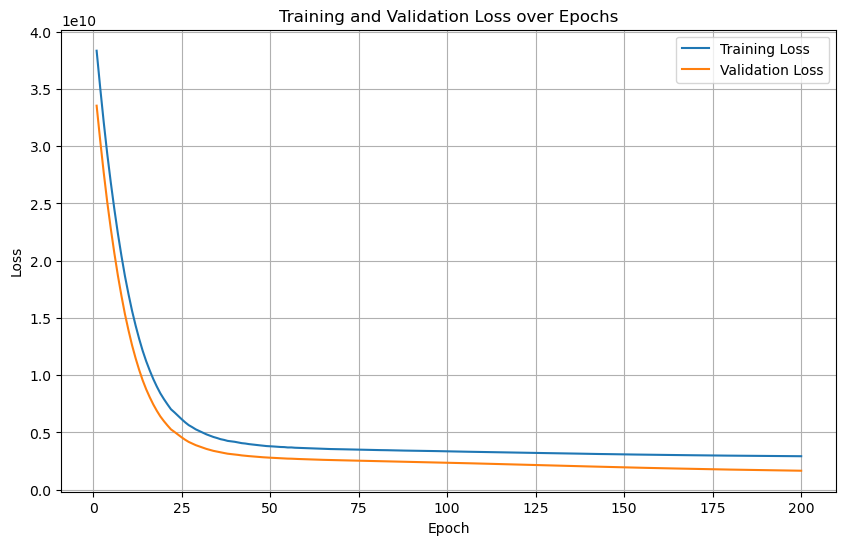

In [16]:
# Train with Linear Regression
lr_model = LinearRegression(X.shape[1])
lr_model, train_losses, val_losses = split_and_train(X, y, lr_model, NUM_EPOCHS)
plot_losses(train_losses, val_losses)

Epoch [10/200], 	             Training Loss: 4887194624.0000, 	             Validation Loss: 1970727308.8000
Epoch [20/200], 	             Training Loss: 5633792512.0000, 	             Validation Loss: 2363780595.2000
Epoch [30/200], 	             Training Loss: 4640906240.0000, 	             Validation Loss: 2009417459.2000
Epoch [40/200], 	             Training Loss: 4119612160.0000, 	             Validation Loss: 1760228102.4000
Epoch [50/200], 	             Training Loss: 3453717504.0000, 	             Validation Loss: 1598946534.4000
Epoch [60/200], 	             Training Loss: 3426598656.0000, 	             Validation Loss: 1537938681.6000
Epoch [70/200], 	             Training Loss: 3199922944.0000, 	             Validation Loss: 1491630681.6000
Epoch [80/200], 	             Training Loss: 3883083264.0000, 	             Validation Loss: 2143514022.4000
Epoch [90/200], 	             Training Loss: 2947842560.0000, 	             Validation Loss: 1606846003.2000
Epoch [100/200], 	 

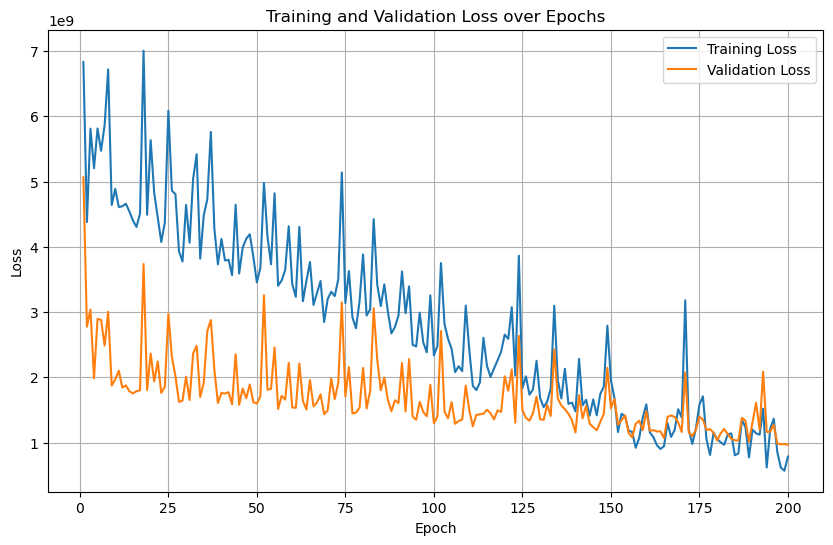

In [19]:
# Train with NN
input_size = X.shape[1]
nn_model = NeuralNetwork(input_size)
nn_model, train_losses, val_losses = split_and_train(X, y, nn_model, NUM_EPOCHS)
plot_losses(train_losses, val_losses)

In [20]:
testing_df = preprocess_data(TESTING_CSV_PATH,
                             FEATURE_CONFIG_PATH).astype(np.float32)
submission = predict_test_data(nn_model, testing_df)
submission.to_csv('housing/housing_predictions.csv', index=False)